# Les gaz à effet de serre au Québec
---

<div style="text-align: center;">
    <div style="display: inline-block; position: relative; width: 350px;">
        <img src="../img/_cc50555b-1857-4a03-a71b-744befcfb323.jpeg" alt="Dessin" style="width: 100%;"/>
        <p style="text-align: center; margin-top: 5px;">
            <span style="font-style: italic; font-size: 16px;"> Solution simple </span><br/>
            <span style="font-style: italic; font-size: 12px;">Image générée par DALL·E 3, 2024 </span>
        </p>
    </div>
</div>



## Mise en contexte:

Les données de l'inventaire québécois des émissions de gaz à effet de serre, sont disponibles chez [Données Québec](https://www.donneesquebec.ca/recherche/dataset/inventaire-quebecois-des-emissions-de-gaz-a-effet-de-serre "https://www.donneesquebec.ca/recherche/dataset/inventaire-quebecois-des-emissions-de-gaz-a-effet-de-serre"):

> "L’inventaire des émissions de gaz à effet de serre (GES) produits par l’activité humaine au Québec est tenu à jour annuellement depuis 1990 
par le ministère de l’Environnement, de la Lutte contre les changements climatiques, de la Faune et des Parcs. Cet inventaire est établi à partir de données recueillies auprès d’entreprises et d’institutions et se base sur des données obtenues principalement de Statistique Canada, d’Environnement et Changement climatique Canada (ECCC) et de ministères et organismes du Québec." 

Dernière modification du jeux de données pour ce notebook : 2022-12-21 

## Objectifs:

L'objectif de ce notebook est d'utiliser la méthode `groupby`
 relative aux dataframes afin d'obtenir le total des GES émis par secteur d'activité.

---
# Importation des données

Afin de lire et d'explorer les données, nous utilisons la librairie pandas avec toutes les fonctionnalités des Dataframes. 

In [1]:
# Initialisation de la librairie Pandas.
import pandas as pd

# Importation des données. Le fichier csv (coma-separated-value) se nomme "inventaire-ges.csv" 
# et les données sont séparées par des points-virgules (;).
df = pd.read_csv('../data/inventaire-ges.csv',sep = ';')  
df

,Annee,Secteur,Sous-secteur,Categorie,Emissions(t_eq_CO2)
0,1990,Transports,Transport routier,Automobiles,1.085804e+07
1,1990,Transports,Transport routier,Camions légers,3.636960e+06
2,1990,Transports,Transport routier,Véhicules lourds,3.602432e+06
3,1990,Transports,Transport routier,Autres transports routiers,1.824648e+04
4,1990,Transports,Autres transports,Véhicules hors route - Agriculture et foresterie,9.985400e+05
...,...,...,...,...,...
1445,2020,Matières résiduelles,Lieux d'enfouissement réservés aux usines de p...,Lieux d'enfouissement réservés aux usines de p...,6.994292e+04
1446,2020,Matières résiduelles,Traitement biologique des matières résiduelles,Traitement biologique des matières résiduelles,7.126235e+04
1447,2020,Matières résiduelles,Traitement et rejet des eaux usées municipales,Traitement et rejet des eaux usées municipales,4.134772e+05
1448,2020,Matières résiduelles,Incinération des matières résiduelles,Incinération des matières résiduelles,2.124926e+05


In [2]:
# Le nombre de ligne (rows) et de colonne (columns) est: 
df.shape

(1450, 5)

In [3]:
# Le nom des colonnes, sous forme d'une array numpy. 
df.columns

Index(['Annee', 'Secteur', 'Sous-secteur', 'Categorie', 'Emissions(t_eq_CO2)'], dtype='object')

In [4]:
# Le nom des colonnes, sous forme d'une liste normale.
df.columns.tolist()

['Annee', 'Secteur', 'Sous-secteur', 'Categorie', 'Emissions(t_eq_CO2)']

In [5]:
# Le types de variables dans chaque colonne: 
df.dtypes

Annee                    int64
Secteur                 object
Sous-secteur            object
Categorie               object
Emissions(t_eq_CO2)    float64
dtype: object

In [6]:
# L'index du dataframe: 
df.index

RangeIndex(start=0, stop=1450, step=1)

In [7]:
# Pour travailler les éléments d'une seule colonne, il faut travailler avec les Séries:
df['Annee']

0       1990
1       1990
2       1990
3       1990
4       1990
        ... 
1445    2020
1446    2020
1447    2020
1448    2020
1449    2020
Name: Annee, Length: 1450, dtype: int64

In [8]:
# Élements uniques de la colonne Secteur. Sous forme d'une liste normale.
secteurs = df['Secteur'].unique().tolist()
secteurs

['Transports',
 'Industries',
 'Résidentiel, commercial et institutionnel',
 'Agriculture',
 'Matières résiduelles',
 'Électricité']

In [9]:
# Élements uniques de la colonne Sous-secteur. Sous forme d'une liste normale.
df['Sous-secteur'].unique().tolist()

['Transport routier',
 'Autres transports',
 'Transport aérien',
 'Transport ferroviaire',
 'Transport maritime',
 'Combustion industrielle',
 'Procédés industriels et utilisation des produits',
 'Émissions fugitives',
 'Résidentiel',
 'Commercial et institutionnel',
 'Fermentation entérique',
 'Gestion du fumier',
 'Gestion des sols agricoles',
 'Chaulage, urée et autres engrais carbonés',
 "Lieux d'enfouissement municipaux ",
 "Lieux d'enfouissement réservés aux usines de pâtes et papiers",
 'Traitement et rejet des eaux usées municipales',
 'Incinération des matières résiduelles',
 'Électricité',
 'Traitement biologique des matières résiduelles']

In [10]:
# Élements uniques de la colonne 'Categorie'. Sous forme d'une liste normale.
df['Categorie'].unique().tolist()

['Automobiles',
 'Camions légers',
 'Véhicules lourds',
 'Autres transports routiers',
 'Véhicules hors route - Agriculture et foresterie',
 'Véhicules hors route - Commercial et institutionnel',
 'Véhicules hors route - Fabrication, mines et construction',
 'Véhicules hors route - Résidentiel',
 'Véhicules hors route - Autres',
 'Pipelines',
 'Transport aérien intérieur',
 'Transport aérien militaire',
 'Transport ferroviaire',
 'Transport maritime intérieur',
 'Transport maritime pêcheries',
 'Transport maritime militaire',
 'Industries de raffinage du pétrole',
 'Exploitation minière',
 'Production de métaux ferreux',
 'Usines de pâtes et papiers',
 'Industries chimiques',
 'Production de minéraux non métalliques',
 'Production de métaux non ferreux',
 'Autres manufacturiers',
 'Construction',
 'Agriculture et foresterie',
 "Production d'aluminium et de magnésium",
 'Autres utilisations non énergétiques',
 "Fabrication et utilisation d'autres produits",
 'Pétrole et gaz naturel',
 '

In [11]:
# Élements absents
df.isna().sum()

Annee                  0
Secteur                0
Sous-secteur           0
Categorie              0
Emissions(t_eq_CO2)    0
dtype: int64

In [12]:
# Élements absents
df.isnull().sum()

Annee                  0
Secteur                0
Sous-secteur           0
Categorie              0
Emissions(t_eq_CO2)    0
dtype: int64

---
# Construction de la nouvelle dataframe: 

Ici, nous construisons une nouvelle dataframe nommée df_secteurs_total qui va contenir le total des GES émis par secteur d'activité: Transports, Industries, Résidentiel, commercial et institutionnel, Agriculture, Matières résiduelles et Électricité.

Les étapes pour construire df_secteurs_total sont:

---
## Construction 1: obtention du total par année:

In [13]:
# Sélectionner les colonnes 'Annee' et 'Emissions(t_eq_CO2)'.
df[['Annee','Emissions(t_eq_CO2)']]

,Annee,Emissions(t_eq_CO2)
0,1990,1.085804e+07
1,1990,3.636960e+06
2,1990,3.602432e+06
3,1990,1.824648e+04
4,1990,9.985400e+05
...,...,...
1445,2020,6.994292e+04
1446,2020,7.126235e+04
1447,2020,4.134772e+05
1448,2020,2.124926e+05


In [14]:
# Grouper les données par 'Annee'.
df[['Annee','Emissions(t_eq_CO2)']].groupby('Annee')

In [15]:
# Calculer le total des émissions par année.
df_total = df[['Annee','Emissions(t_eq_CO2)']].groupby('Annee').sum()
df_total;

In [16]:
# Afficher les noms des colonnes de la DataFrame résultante.
df_total.columns

Index(['Emissions(t_eq_CO2)'], dtype='object')

In [17]:
# Renommer la colonne des émissions pour indiquer qu'il s'agit du total.
df_total = df_total.rename(columns={"Emissions(t_eq_CO2)": "Emissions(t_eq_CO2)-Total"})

In [18]:
# Décrire statistiquement les données.
df_total.describe()

,Emissions(t_eq_CO2)-Total
count,3.100000e+01
mean,8.276538e+07
std,3.345179e+06
min,7.401563e+07
25%,8.100227e+07
50%,8.274214e+07
75%,8.462749e+07
max,8.958743e+07


<Axes: title={'center': 'Émissions en fonction du temps'}, xlabel='années', ylabel='Emissions (t_eq_CO2)'>

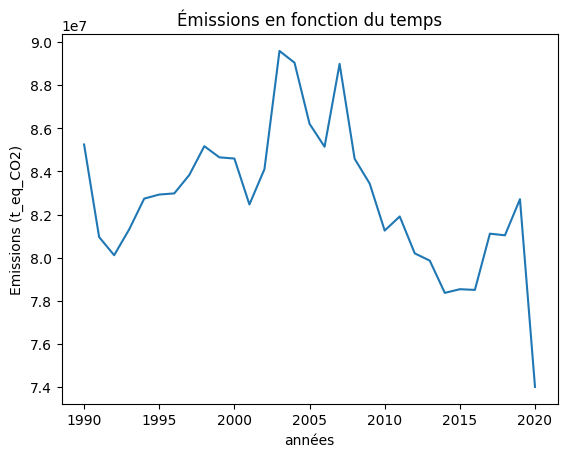

In [19]:
# Tracer les données pour visualiser les émissions totales par année.
df_total.plot(xlabel="années", ylabel="Emissions (t_eq_CO2)", title='Émissions en fonction du temps', legend=None)

---
## Construction 2: obtention du total par année pour le secteur 'Transports':

In [20]:
# Filtrer les données pour le secteur 'Transports' seulement
df_transports = df[df['Secteur']=='Transports']
# Calculer le total des émissions par année pour le secteur 'Transports'.
df_transports_total = df_transports[['Annee','Emissions(t_eq_CO2)']].groupby('Annee').sum()
# Renommer la colonne des émissions pour indiquer qu'il s'agit des émissions pour le secteur 'Transports'.
df_transports_total = df_transports_total.rename(columns={"Emissions(t_eq_CO2)": "Emissions(t_eq_CO2)-Transports"})
df_transports_total;

In [21]:
# Fusionner les DataFrames des totaux globaux et du secteur 'Transports' sur la colonne 'Annee'.
df_merge = pd.merge(df_total, df_transports_total, on=["Annee"])
# df_merge

In [22]:
# Alternative pour fusionner les DataFrames.
df_merge = df_total.merge(df_transports_total,on=["Annee"])
# df_merge

---
## Construction 3: obtention du total par année pour tous les secteurs:

In [23]:
# Afficher la liste des secteurs.
secteurs

['Transports',
 'Industries',
 'Résidentiel, commercial et institutionnel',
 'Agriculture',
 'Matières résiduelles',
 'Électricité']

In [24]:
# Initialiser la DataFrame résultante avec le total global par année.
df_secteurs_total = df_total

# Boucle sur chaque secteur pour calculer et fusionner les totaux par année.
for secteur in secteurs:
    # Filtrer les données pour le secteur en cours.
    df_secteur = df[df['Secteur']==secteur]
    # Calculer le total des émissions par année pour le secteur en cours.
    df_secteur_total = df_secteur[['Annee','Emissions(t_eq_CO2)']].groupby('Annee').sum()
    # Renommer la colonne des émissions pour indiquer qu'il s'agit des émissions pour le secteur en cours.
    df_secteur_total = df_secteur_total.rename(columns={"Emissions(t_eq_CO2)": f'Emissions(t_eq_CO2)-{secteur}'})
    # Fusionner les totaux par secteur avec la DataFrame résultante.
    df_secteurs_total = df_secteurs_total.merge(df_secteur_total, on=["Annee"])

df_secteurs_total  

,Emissions(t_eq_CO2)-Total,Emissions(t_eq_CO2)-Transports,Emissions(t_eq_CO2)-Industries,"Emissions(t_eq_CO2)-Résidentiel, commercial et institutionnel",Emissions(t_eq_CO2)-Agriculture,Emissions(t_eq_CO2)-Matières résiduelles,Emissions(t_eq_CO2)-Électricité
Annee,,,,,,,
1990,8.525046e+07,2.720549e+07,3.207667e+07,1.121535e+07,7.117844e+06,6.242370e+06,1.392747e+06
1991,8.096232e+07,2.562506e+07,3.114813e+07,1.048791e+07,6.986795e+06,6.356778e+06,3.576496e+05
1992,8.011936e+07,2.617208e+07,2.946168e+07,1.119121e+07,6.920532e+06,5.544630e+06,8.292302e+05
1993,8.131694e+07,2.710587e+07,3.049741e+07,1.131267e+07,6.845626e+06,5.414277e+06,1.410925e+05
1994,8.274214e+07,2.846825e+07,3.057562e+07,1.130135e+07,6.903481e+06,5.293982e+06,1.994636e+05
1995,8.293150e+07,2.888283e+07,3.013029e+07,1.125606e+07,6.973976e+06,5.541953e+06,1.463866e+05
1996,8.298410e+07,2.905895e+07,3.003876e+07,1.159712e+07,7.075151e+06,5.082511e+06,1.316073e+05
1997,8.383858e+07,2.978185e+07,3.030741e+07,1.134331e+07,7.309203e+06,4.913877e+06,1.829265e+05
1998,8.517211e+07,3.046314e+07,3.054083e+07,1.013746e+07,7.413943e+06,5.058890e+06,1.557845e+06


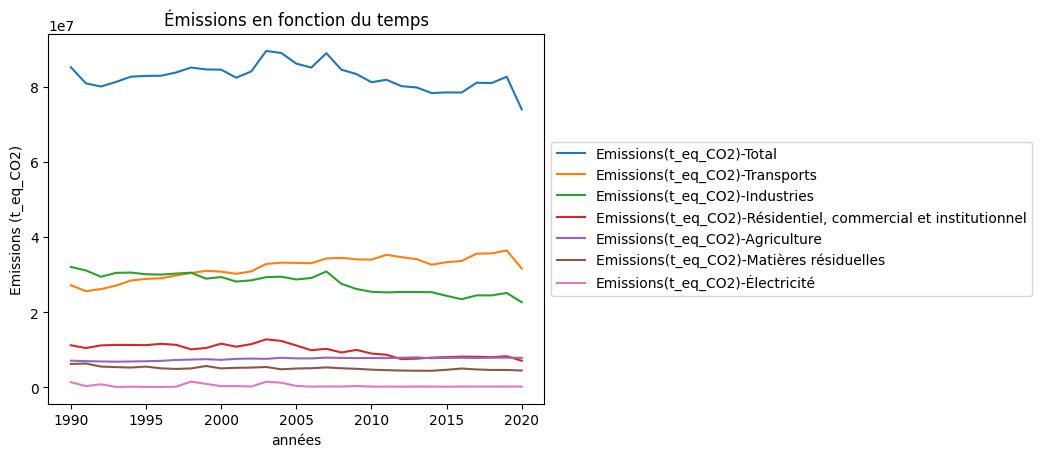

In [25]:
# Tracer les données pour visualiser les émissions par secteur et par année.
ax = df_secteurs_total.plot(xlabel="années", ylabel="Emissions (t_eq_CO2)", title='Émissions en fonction du temps')
# Positionner la légende à côté du graphique
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

---
# Exportation de la nouvelle dataframe:

In [26]:
# Exporter la DataFrame résultante vers un fichier Excel.
df_secteurs_total.to_excel("../output/df_secteurs_total.xlsx",sheet_name='Emissions(t_eq_CO2) par secteur') 

In [27]:
# Exporter la DataFrame résultante vers un fichier CSV.
df_secteurs_total.to_csv("../output/df_secteurs_total.csv") 